<a href="https://colab.research.google.com/github/hudsonhorta/analise_exploratoria/blob/main/C%C3%B3pia_hudson_de_analise_exploratoria_dados_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória dos dados coletados do Mercado Livre


[Github com arquivos dos dados](https://github.com/cassiasamp/calculadora-de-imoveis-mar-21)



In [57]:
# importando as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [58]:
url = "https://raw.githubusercontent.com/cassiasamp/calculadora-de-imoveis-mar-21/main/manipulacao-de-dados/dados_tratados_ml.csv"

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,aluguel,zona,area,quarto
0,1000.0,sul,48.0,2.0
1,1200.0,sul,67.0,3.0
2,1300.0,sul,65.0,2.0
3,1280.0,sul,65.0,2.0
4,1100.0,sul,50.0,2.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   aluguel  1152 non-null   float64
 1   zona     1152 non-null   object 
 2   area     1152 non-null   float64
 3   quarto   1152 non-null   float64
dtypes: float64(3), object(1)
memory usage: 36.1+ KB


In [7]:
df.describe().T # describe da estatística descritiva

,count,mean,std,min,25%,50%,75%,max
aluguel,1152.0,2497.282986,1743.603188,500.0,1471.0,2000.0,2900.0,15000.0
area,1152.0,77.013889,61.441147,12.0,46.0,60.0,85.0,800.0
quarto,1152.0,1.984375,0.808146,1.0,1.0,2.0,2.0,5.0


In [59]:
df[['aluguel', 'quarto']]

,aluguel,quarto
0,1000.0,2.0
1,1200.0,3.0
2,1300.0,2.0
3,1280.0,2.0
4,1100.0,2.0
...,...,...
1147,3000.0,1.0
1148,1700.0,4.0
1149,1800.0,1.0
1150,3400.0,3.0


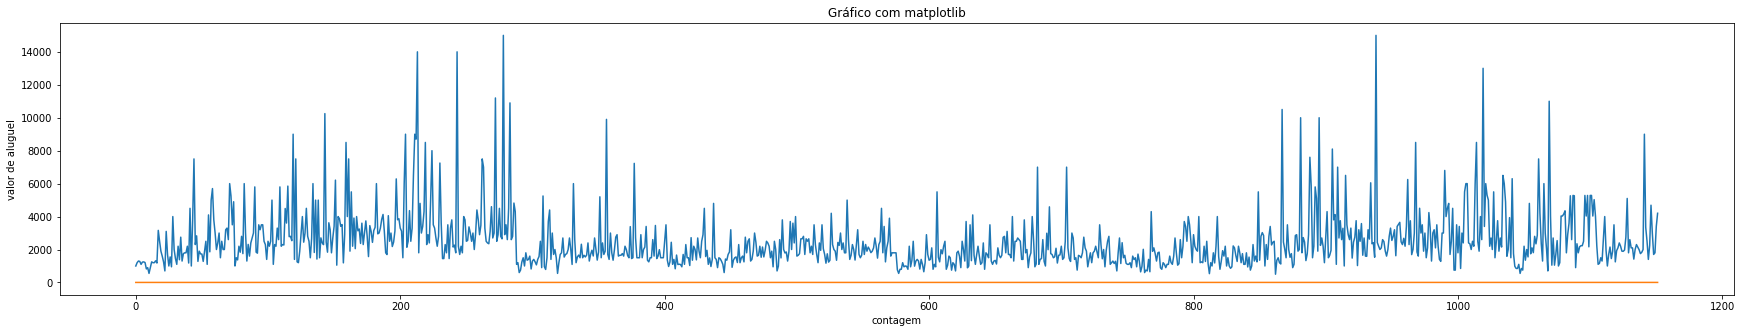

In [60]:
plt.figure(figsize=(30, 5)) # largura, altura
plt.plot(df[['aluguel', 'quarto']])
plt.ylabel('valor de aluguel')
plt.xlabel('contagem')
plt.title('Gráfico com matplotlib');

In [11]:
df['quarto'].values

array([2., 3., 2., ..., 1., 3., 3.])

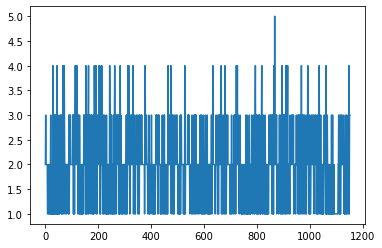

In [12]:
plt.plot(df['quarto'].values);


Primeira hipótese: será que os aluguéis vão aumentando de acordo com o número de quartos?

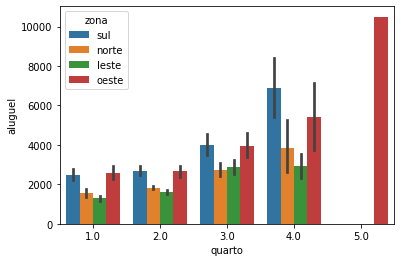

In [14]:
sns.barplot(x='quarto', y='aluguel', data=df, hue='zona');

Nos dados que coletamos essa hipótese se mantém e também podemos ver que os aluguéis são mais caros na zona sul e, em seguida, na zona oeste.

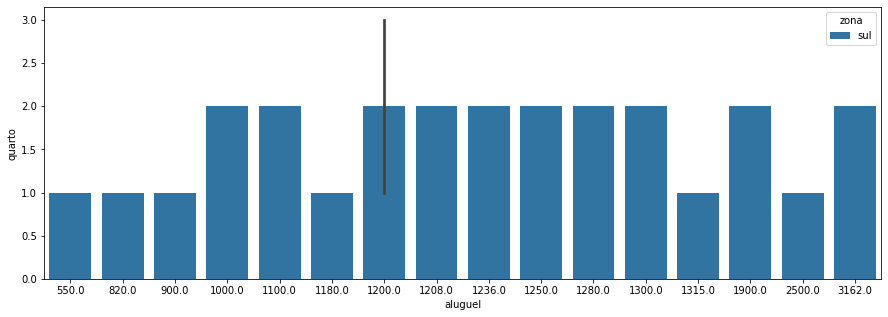

In [15]:
plt.figure(figsize=(15, 5))
sns.barplot(y='quarto', x='aluguel', data=df[:20], hue='zona');

In [16]:
# Qual gráfico podemos usar para ver como os nossos dados estão distribuídos?
# histograma

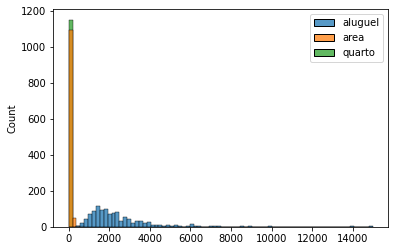

In [17]:
sns.histplot(data=df);

Percebemos que as distribuições e area e aluguel são assimétricas e enviesadas à direita (tem a cauda para a direita), por isso, elas são consideradas Log Normais.

E se fizermos uma transformação logaritmica nesses dados, tornamos essas distribuição mais próxima da distribuição normal.

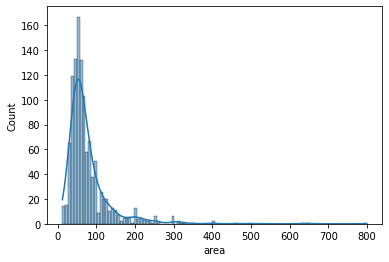

In [18]:
sns.histplot(data=df, x='area', kde=True);

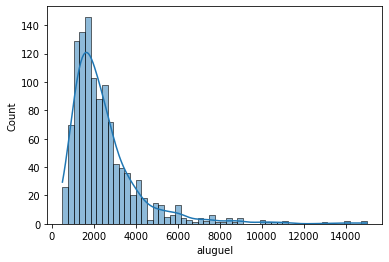

In [19]:
sns.histplot(data=df, x='aluguel', kde=True);

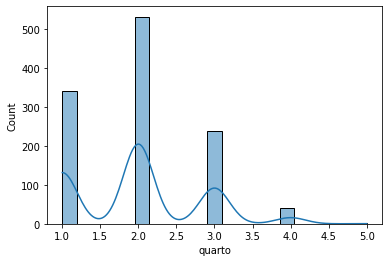

In [20]:
sns.histplot(data=df, x='quarto', kde=True);

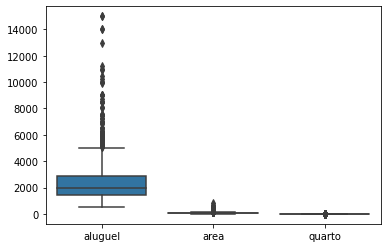

In [21]:
sns.boxplot(data=df);

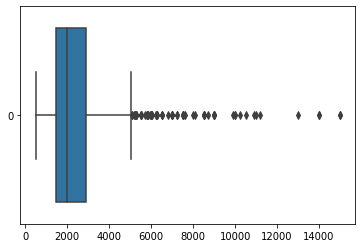

In [22]:
sns.boxplot(data=df['aluguel'], orient='h');

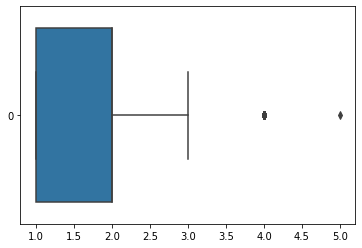

In [23]:
sns.boxplot(data=df['quarto'], orient='h');

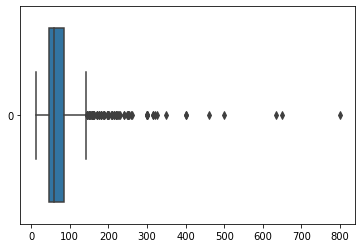

In [24]:
sns.boxplot(data=df['area'], orient='h');

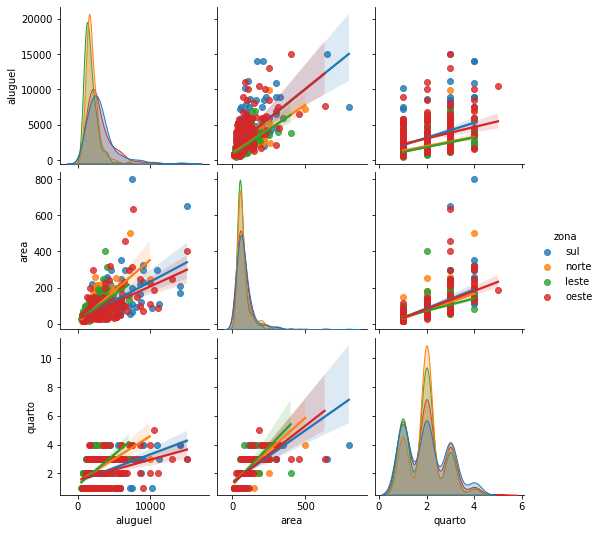

In [25]:
sns.pairplot(data=df, hue='zona', kind='reg');

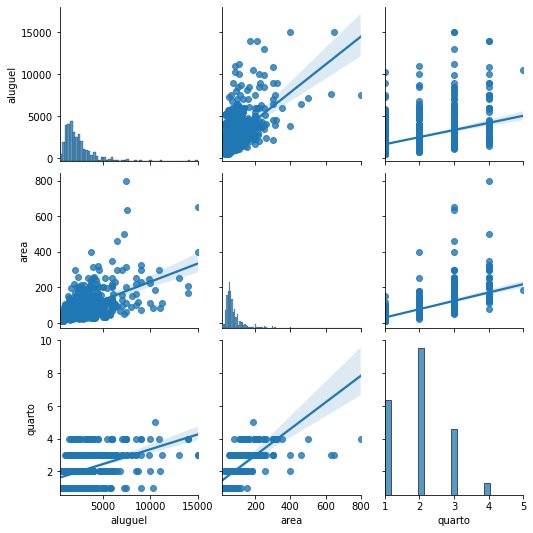

In [26]:
sns.pairplot(data=df, kind='reg');

Há diversos tipos de correlação, dependendo da distribuição dos dados, algumas se encaixam melhor para o cálculo.

In [27]:
correlacao_p = df.corr() # correlação de Pearson

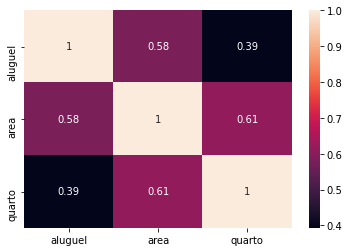

In [28]:
sns.heatmap(correlacao_p, annot=True);

In [29]:
correlacao_s = df.corr(method='spearman')

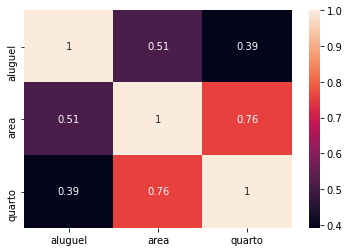

In [30]:
sns.heatmap(correlacao_s, annot=True);

## Aplicando Log1p para analisar como irá ficar os dados


## Fazendo o one hot encoding das variáveis categóricas de Zona


In [31]:
df = pd.get_dummies(df)
df.head()

,aluguel,area,quarto,zona_leste,zona_norte,zona_oeste,zona_sul
0,1000.0,48.0,2.0,0,0,0,1
1,1200.0,67.0,3.0,0,0,0,1
2,1300.0,65.0,2.0,0,0,0,1
3,1280.0,65.0,2.0,0,0,0,1
4,1100.0,50.0,2.0,0,0,0,1
...,...,...,...,...,...,...,...
1147,3000.0,47.0,1.0,0,0,1,0
1148,1700.0,199.0,4.0,0,0,1,0
1149,1800.0,85.0,1.0,0,0,1,0
1150,3400.0,97.0,3.0,0,0,1,0


In [32]:
df_log = np.log1p(df)

In [52]:
df_log.head()

,aluguel,area,quarto,zona_leste,zona_norte,zona_oeste,zona_sul
0,6.908755,3.891820,1.098612,0.0,0.0,0.0,0.693147
1,7.090910,4.219508,1.386294,0.0,0.0,0.0,0.693147
2,7.170888,4.189655,1.098612,0.0,0.0,0.0,0.693147
3,7.155396,4.189655,1.098612,0.0,0.0,0.0,0.693147
4,7.003974,3.931826,1.098612,0.0,0.0,0.0,0.693147


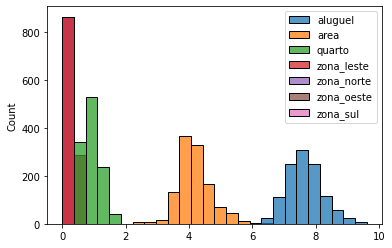

In [36]:
sns.histplot(data=df_log);

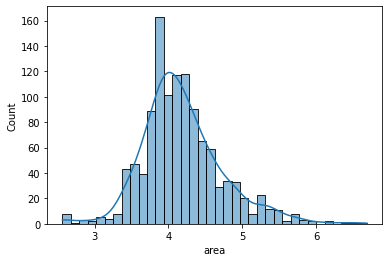

In [37]:
sns.histplot(data=df_log, x='area', kde=True);

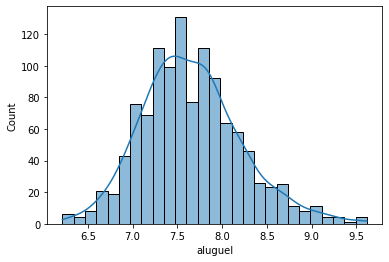

In [38]:
sns.histplot(data=df_log, x='aluguel', kde=True);

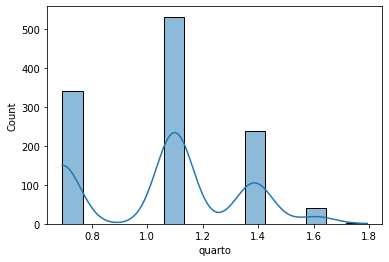

In [39]:
sns.histplot(data=df_log, x='quarto', kde=True);

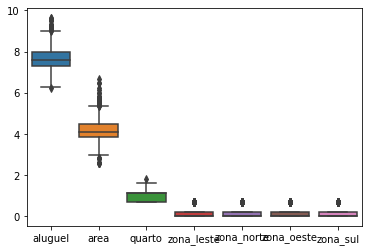

In [40]:
sns.boxplot(data=df_log);

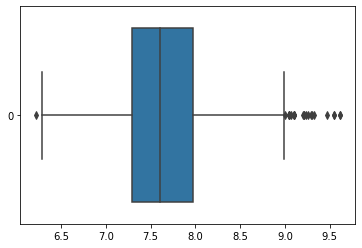

In [41]:
sns.boxplot(data=df_log['aluguel'], orient='h');

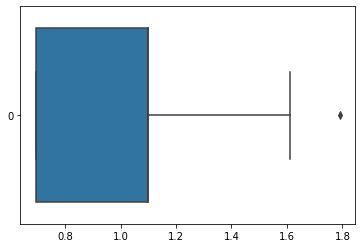

In [42]:
sns.boxplot(data=df_log['quarto'], orient='h');

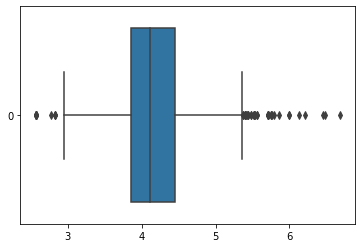

In [43]:
sns.boxplot(data=df_log['area'], orient='h');

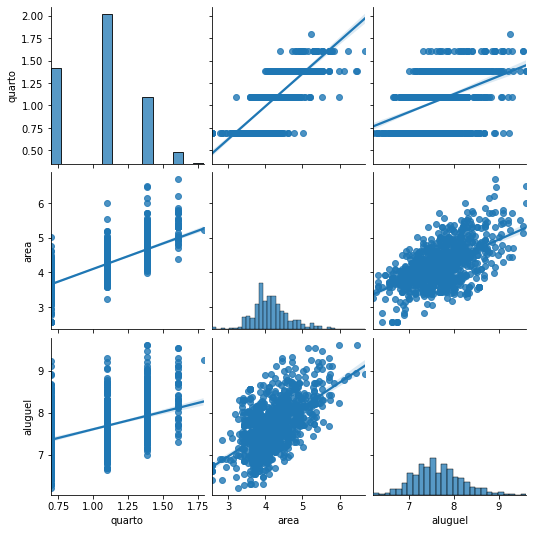

In [55]:
sns.pairplot(data=df_log[['quarto','area','aluguel']], kind='reg');

In [64]:
correlacao_p = df_log[['quarto','area','aluguel']].corr() # correlação de Pearson

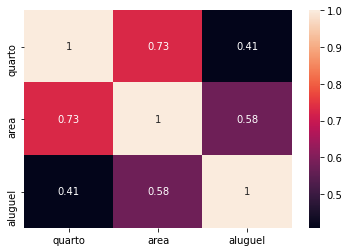

In [65]:
sns.heatmap(correlacao_p, annot=True);

In [69]:
correlacao_s = df_log[['quarto','area','aluguel']].corr(method='spearman')

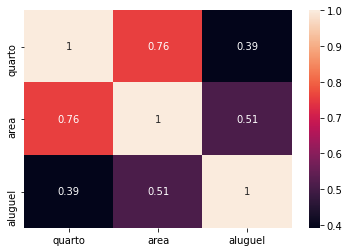

In [70]:
sns.heatmap(correlacao_s, annot=True);